In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
import os
os.chdir("C:\\Users\\jatin\\Desktop")

In [19]:
df = pd.read_excel('Efficiency.xlsx')
df.head()

,Unique Identifier,Delivery_person_Age,Delivery_person_Ratings,Distance,Time_taken,Total Clocked Hours,Type_of_order,Vibration alert,Acceleration Events,Braking Events,Efficiency
0,Zom_1000,37,4.9,4,15.00,8,Zomato,1,5,6,78.416667
1,Zom_1001,34,4.5,7,26.25,9,Zomato,3,4,5,77.166667
2,Swi_1002,23,4.4,11,41.25,6,Swiggy,2,3,8,75.833333
3,Bli_1003,38,4.7,5,18.75,8,Blinkit,2,2,6,77.333333
4,Zom_1004,32,4.6,11,41.25,6,Zomato,1,3,7,78.250000


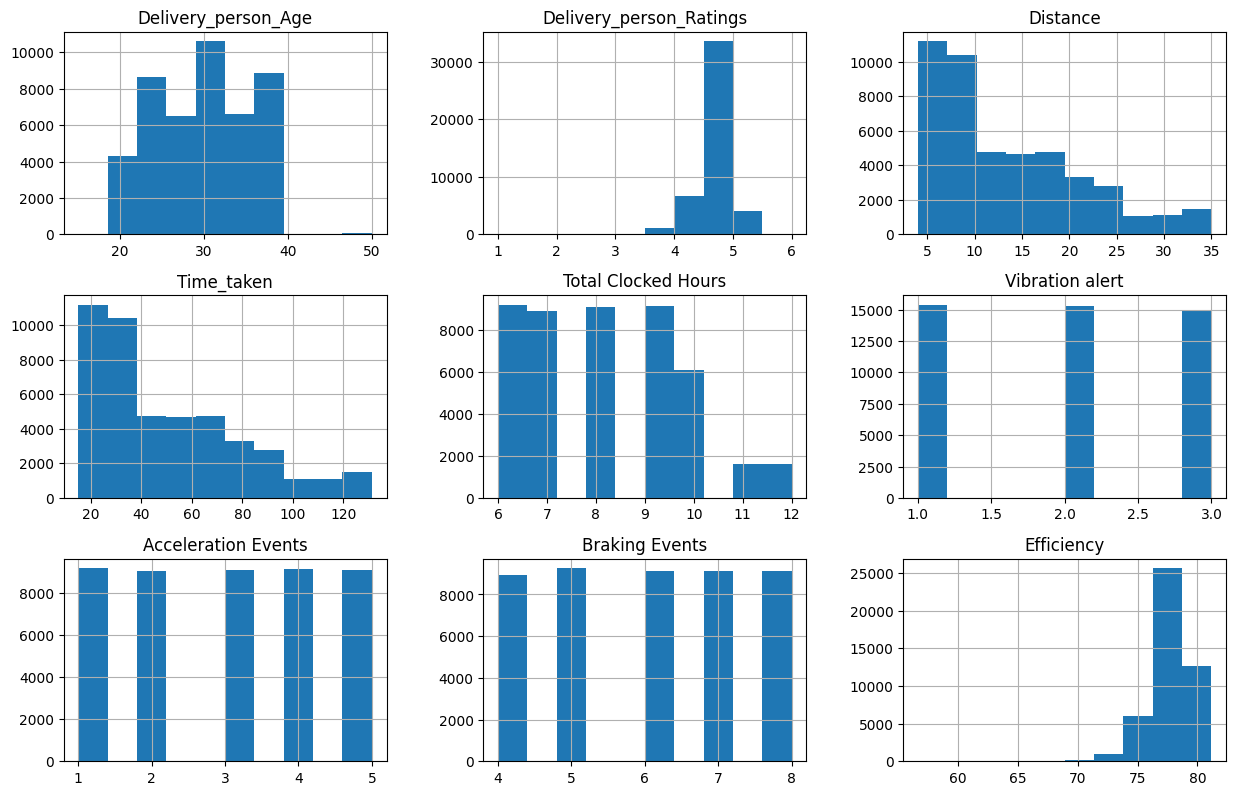

In [20]:
df.hist(figsize=(15,30),layout=(9,3))
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique Identifier        45593 non-null  object 
 1   Delivery_person_Age      45593 non-null  int64  
 2   Delivery_person_Ratings  45593 non-null  float64
 3   Distance                 45593 non-null  int64  
 4   Time_taken               45593 non-null  float64
 5   Total Clocked Hours      45593 non-null  int64  
 6   Type_of_order            45593 non-null  object 
 7   Vibration alert          45593 non-null  int64  
 8   Acceleration Events      45593 non-null  int64  
 9   Braking Events           45593 non-null  int64  
 10  Efficiency               45593 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 3.8+ MB


In [22]:
df.isnull().sum()

Unique Identifier          0
Delivery_person_Age        0
Delivery_person_Ratings    0
Distance                   0
Time_taken                 0
Total Clocked Hours        0
Type_of_order              0
Vibration alert            0
Acceleration Events        0
Braking Events             0
Efficiency                 0
dtype: int64

<AxesSubplot: >

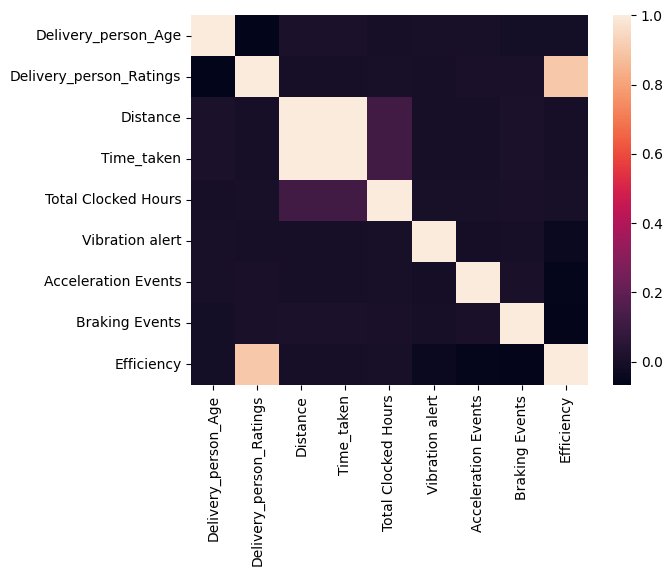

In [23]:
sns.heatmap(df.corr())


In [24]:
le = LabelEncoder()
df['Type_of_order'] = le.fit_transform(df['Type_of_order'])

In [25]:
# Split the data
X = df.drop(['Efficiency', 'Unique Identifier'], axis=1) 
y = df['Efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XG Boost Boosting": XGBRegressor(),
}

Linear Regression Model RMSE: 0.7421549797859737
Linear Regression Model R2 Score: 0.8297205321719352
Decision Tree Model RMSE: 0.07060462432850327
Decision Tree Model R2 Score: 0.9984588696769431
Random Forest Model RMSE: 0.0491718729721729
Random Forest Model R2 Score: 0.9992525079560937
XG Boost Boosting Model RMSE: 0.03222045312015685
XG Boost Boosting Model R2 Score: 0.999679050753957


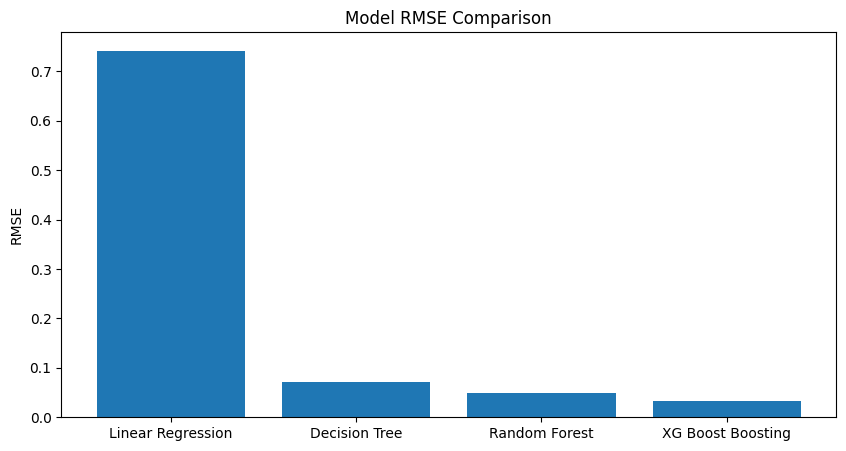

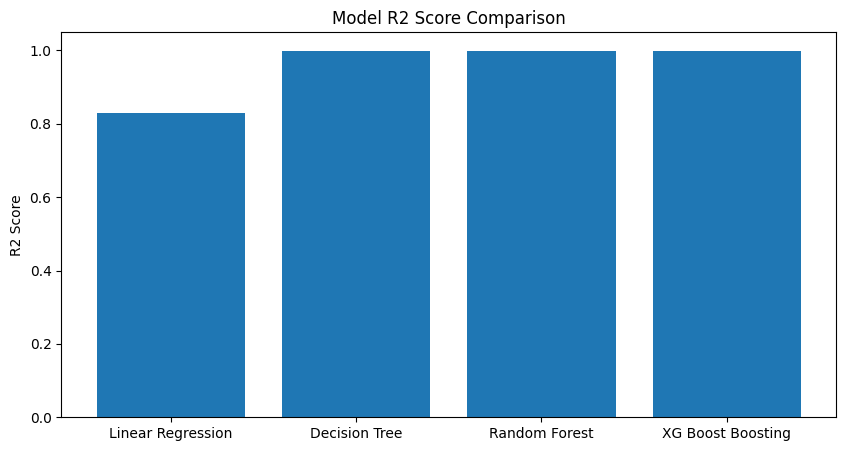

In [27]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Training, Evaluation and Visualization
rmse_scores = []
r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    print(f"{name} Model RMSE: {rmse}")
    print(f"{name} Model R2 Score: {r2}")

# Bar chart for RMSE
plt.figure(figsize=(10, 5))
plt.bar(models.keys(), rmse_scores)
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.show()

# Bar chart for R2 Score
plt.figure(figsize=(10, 5))
plt.bar(models.keys(), r2_scores)
plt.title('Model R2 Score Comparison')
plt.ylabel('R2 Score')
plt.show()

In [28]:

# Import necessary libraries
import ipywidgets as widgets
from IPython.display import display

# Create widgets for each feature
age_widget = widgets.IntSlider(min=18, max=70, value=25, description='Age:')
ratings_widget = widgets.FloatSlider(min=0, max=5, step=0.1, value=3, description='Ratings:')
distance_widget = widgets.FloatSlider(min=0, max=50, step=0.1, value=10, description='Distance:')
Total_hours_clocked = widgets.IntSlider(min=1, max=12, value=25, description='Total hours clocked:')
order_widget = widgets.Dropdown(options=le.classes_, description='Order Type:')
vibration_widget = widgets.IntSlider(min=0, max=10, value=5, description='Vibration Alerts:')
time_widget = widgets.IntSlider(min=0, max=120, value=30, description='Time Taken:')
acceleration_widget = widgets.IntSlider(min=0, max=10, value=5, description='Acceleration Events:')
braking_widget = widgets.IntSlider(min=0, max=10, value=5, description='Braking Events:')

# Create a button to trigger prediction
predict_button = widgets.Button(description='Predict Efficiency')

# Display the widgets
display(age_widget, ratings_widget, distance_widget, order_widget, Total_hours_clocked, vibration_widget, time_widget, acceleration_widget, braking_widget, predict_button)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Define the function to be triggered on button click
def predict(button):
    # Create a DataFrame from the widget values
    data1 = pd.DataFrame({
        'Delivery_person_Age': [age_widget.value],
        'Delivery_person_Ratings': [ratings_widget.value],
        'Distance': [distance_widget.value],
        'Time_taken': [time_widget.value],
        'Total Clocked Hours': [Total_hours_clocked.value],
        'Type_of_order': [le.transform([order_widget.value])[0]],  # ensure it's numeric
        'Vibration alert': [vibration_widget.value],
        'Acceleration Events': [acceleration_widget.value],
        'Braking Events': [braking_widget.value]
    })  # ensure the order of columns matches the training data
    
    # Make a prediction
    prediction = xgb_model.predict(data1)  # use the best model to predict
    
    print(f"\nThe estimated efficiency is: {prediction[0]}")

# Set the function to be triggered on button click
predict_button.on_click(predict)


IntSlider(value=25, description='Age:', max=70, min=18)

FloatSlider(value=3.0, description='Ratings:', max=5.0)

FloatSlider(value=10.0, description='Distance:', max=50.0)

Dropdown(description='Order Type:', options=('Blinkit ', 'Swiggy ', 'Zepto ', 'Zomato '), value='Blinkit ')

IntSlider(value=12, description='Total hours clocked:', max=12, min=1)

IntSlider(value=5, description='Vibration Alerts:', max=10)

IntSlider(value=30, description='Time Taken:', max=120)

IntSlider(value=5, description='Acceleration Events:', max=10)

IntSlider(value=5, description='Braking Events:', max=10)

Button(description='Predict Efficiency', style=ButtonStyle())


The estimated efficiency is: 69.03036499023438
